# INSIGHT 사전학습 과제
## 5차시_회귀 심화 세션

## <span style="background-color:#fcd1ff; color:#413939; padding:4px; border-radius:0px;"> **선형회귀** </span>

#### **회귀 분석 프로세스**
: 사전 검증 → 모델 생성 및 모델 fit → 모델 평가 → 모델 성능 개선

**사전 검증**
- 데이터를 탐색하고 전처리(결측치, 이상치) 

**모델 생성 및 모델 fit**
- 회귀 모델을 생성하고, 적합한 모델을 설정하고, 학습시키고, 유의성 검정 

**모델 성능 평가**
- R값 구하고, 회귀 분석 후 검증 가능한 가설 검토하기   

**모델 성능 개선**
- 필요 없는 변수를 제거하며 성능이 개선되는지 확인하고 비선형 모델 활용해보기

#### <span style="background-color:#f0ccff; color:#2d033f; padding:4px; border-radius:0px;"> **다중선형회귀의 수식적 이해** </span>

가장 일반적인 수식 형태:   
$y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_k X_{ki} + \varepsilon_i$

→ y에 영향을 줄 것 같은 여러 설명변수를 채택하여 선형적으로 식을 작성

상수항과 오차항을 제외한 수식 형태:   
$y=w_0x_0+w_1x_1+\cdot\cdot\cdot+w_mx_m=\sum_{i=0}^mw_ix_i=w^Tx$

→ 선형회귀식은 결국 *y라는 종속변수에 대한 여러 설명변수들의 가중평균!!!*

#### <span style="background-color:#f0ccff; color:#2d033f; padding:4px; border-radius:0px;"> **다중선형회귀의 기본가정** </span>

##### **가정 1: 선형성**
$E(y|X) = \beta_1+\beta_2X_2+...+\beta_nX_n$
- 종속변수와 설명변수 간의 관계가 선형적이어야 함
- 검증 방법: scattor plot 찍어보기

##### **가정 2: 독립성**
$X_i, X_j \ is \ linearly\ independent \ for\ all \ i,j$
- 각각의 설명 변수가 서로 선형독립적이어야 함
- 선형독립적이지 않으면 다중공선성이 있음!   
    → 독립 변수들 간 강한 상관관계   
    → 변수 제거하거나, PCA, 규제 선형 모델로 대처 가능   
- 검증 방법: VIF 지수, 상관계수

##### **가정 3: 오차항의 평균은 0**
$E(\varepsilon_i|X_i) = 0$ 
- 오차항 ($\epsilon$): 실제 값과 예측 값 사이의 차이
- 특정 패턴이 없이 랜덤해야 한다!
- 검증 방법: np.mean(residuals)

##### **가정 4: 등분산성**
$Var(\varepsilon_i|X_i) = \sigma^2$
- 오차항$(\epsilon)$의 분산($\sigma^2$) 이 일정해야 한다
- 오차항의 분산이 일정하지 않은 경우, 이분산성(heteroscedasticity)이 있다고 함   
    → 등분산성 가정 만족 안 하면 모델의 예측 정확도가 구간에 따라 크게 달라질 수 있음   
    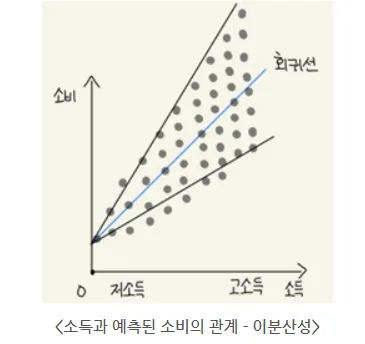
- 검증 방법: 잔차의 도표화

##### **가정 5: 오차항은 자기상관되어 있지 않다**
$Cov(\varepsilon_i, \varepsilon_j|X_i) =0$ 
- 오차항의 공분산은 항상 0
- 오차항의 공분산이 0이 아닌 경우, 자기상관(autocorrelation)이 있다고 함
    - **자기상관**: 한 변수의 **현재 값이 과거 값과 상관관계**를 가지는 현상.
- 모델이 데이터를 랜덤하게 예측하는 것이 아니라, 이전 데이터의 패턴을 학습하여 반복적인 오류를 만들어 낼 가능성이 높음
- 검증 방법: Durbin-Watson 검정(분석 후)

##### **가정 6: 정규성**
$\varepsilon_i \sim N(0, \sigma^2)$
- 오차항이 정규분포를 따른다는 가정
- 가정6은 위배되어도 다중선형회귀분석의 결과에 큰 영향을 주지 않음(선택적)
- 검증 방법: Shapiro-Wilk 검증, Q-Q plot


#### <span style="background-color:#f0ccff; color:#2d033f; padding:4px; border-radius:0px;"> **회귀분석 평가방법** </span>

**회귀선을 데이터와 함께 시각화하거나 통계지표를 이용**

##### **시각화**
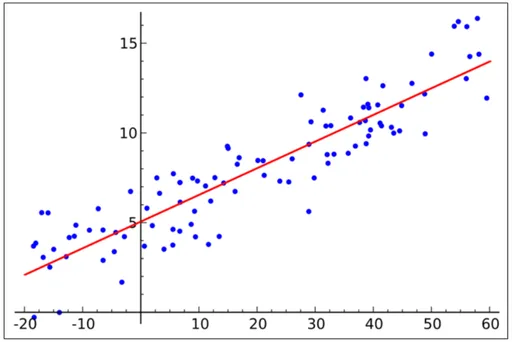
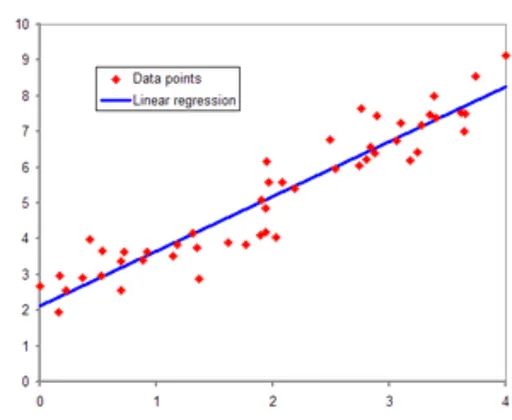

이런 식으로 데이터 전반을 요약할 수 있으나,   
같은 데이터에 대해 여러 회귀선이 있을 때 어떤 회귀선이 해당 데이터를 더 잘 요약하는지 객관적으로 비교하기는 어려움   
→ 통계지표 활용!

##### **통계지표**
<span style="background-color:#a3f5e5; color:#054821; padding:4px; border-radius:0px;"> **모델의 유의성 검정** </span> 

R-square, F검정, T검정, Adjusted R-squared, AIC, BIC 등

**F-statistic, Prob(F-statistic)**   
: 회귀 모델이 유의미한지 검정하는 지표
(종속 변수 y와 전체 독립 변수 X 간의 관계가 통계적으로 유의미한지)
- 귀무가설 $H_0$: **모든 회귀 계수**가 0이다 (독립 변수들이 종속 변수들과 관계가 없다)
- 대립가설 $H_1$: 적어도 하나의 회귀 계수는 0이 아니다 (독립 변수 중 하나 이상이 종속 변수에 영향을 준다)

→ **F-statistic의 값이 클수록** 모델이 **통계적으로 유의미**하다는 것을 의미   
→ P값이 **0.05보다 작다면**, **귀무가설을 기각**할 수 있음

**T-statistic**   
: 각 독립 변수가 종속 변수 y에 유의미한 영향을 미치는지 판단하는 지표
- 귀무가설 $H_0$: **해당 변수의 회귀 계수**가 0이다 (이 변수는 종속 변수에 영향을 미치지 않는다)
- 대립가설 $H_1$: **해당 변수의 회귀 계수**는 0이 아니다 (이 변수는 종속 변수에 유의미한 영향을 준다)

p-value(**P>|t|**)를 기준으로 가설 검정을 수행

- x1: P>|t| 값이 0.000이므로 0.05보다 작다 → **x1**이 종속 변수에 **유의미한 영향**을 미친다.
- x2: P>|t| 값이 0.031이므로 0.05보다 작다 → **x2**가 종속 변수에 **유의미한 영향**을 미친다
- x3: P>|t| 값이 0.569이므로 0.05보다 크다 → **x3**가 종속 변수에 **유의미한 영향을 미치지 않는다.**

<span style="background-color:#a3f5e5; color:#054821; padding:4px; border-radius:0px;"> **모델의 성능 평가** </span> 

**결정 계수 (R-squared, R^2)**   
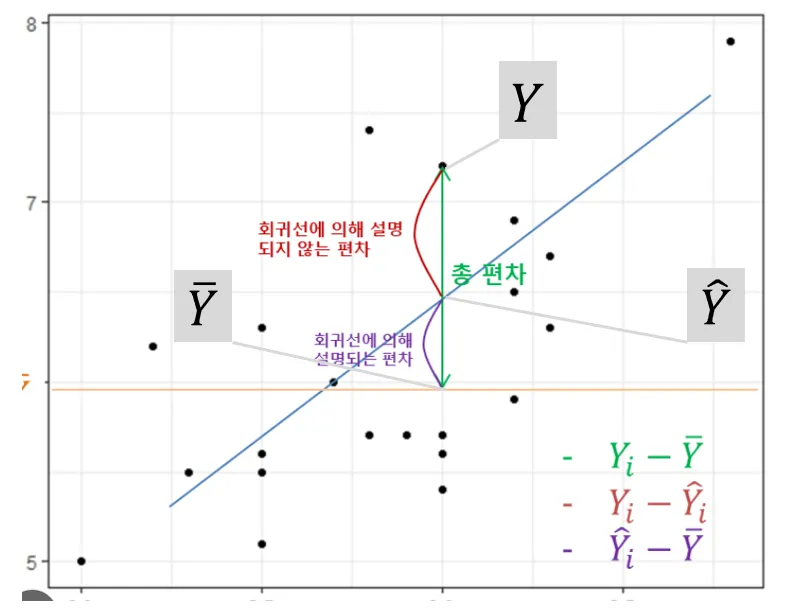
: 회귀 분석에서 모델이 설명하는 데이터의 총 변동(평균과의 차이) 중에서 설명된 비율
→ 데이터의 평균을 예측값으로 사용할 때보다, 모델을 사용할 때 얼마나 더 정확한 예측인지를 나타냄
- 값이 1에 가까울수록 모델이 데이터를 잘 설명한다고 할 수 있음
- 값이 0이면, 데이터들의 평균을 구한 것과 모델로 예측을 한 것이 동일한 것으로, 모델이 데이터를 전혀 설명하지 못한다고 할 수 있음

**조정된 결정 계수 (Adjusted R-squared, Adjusted R^2)**   
: 변수의 개수 증가에 덜 민감하도록 조정한 지표   
$\overline{R}^2 = \frac{SSR}{SST}\frac{n-1}{n-k}=1-(\frac{SSE/(n-k)}{SST/(n-1)})$

**AIC, BIC(SC)**   
: 두 지표 모두 정보기준(information criteria)이라고도 불리며, 값이 낮을수록 좋다고 평가

## <span style="background-color:#fcd1ff; color:#413939; padding:4px; border-radius:0px;"> **비선형회귀** </span>

<span style="background-color:#a3f5e5; color:#054821; padding:4px; border-radius:0px;"> **다항식 회귀모델** </span> 
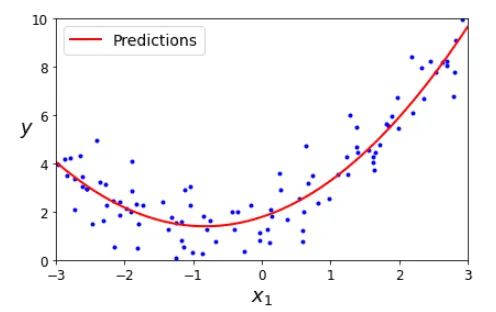
- 기존의 선형 회귀: $Y=a+bX$
- 다항식 회귀 모델: $Y=a+bX+cX^2+dX^3+\cdot\cdot\cdot$의 형태로, 독립 변수에 **거듭제곱 항**을 추가하여 데이터의 **곡선적(비선형적) 특성을 모델링
- 관계가 직선적이지 않고 **곡선을 그리는 데이터 패턴**에서 유용
- **성장률, 감소율** 등이 시간에 따라 변화하는 속도가 다른 경우에 유용

<span style="background-color:#a3f5e5; color:#054821; padding:4px; border-radius:0px;"> **지수 회귀모델** </span> 
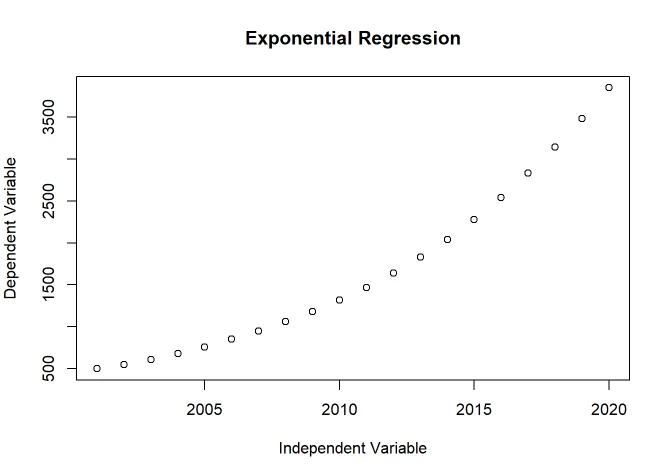
- 종속 변수가 지수적으로 변화하는 관계를 모델링할 때 사용
- 값이 시간에 따라 **지수적으로 증가하거나 감소**하는 경우 적합
- 기술 발전, 투자 수익률 증가 등

<span style="background-color:#a3f5e5; color:#054821; padding:4px; border-radius:0px;"> **로그 회귀모델** </span> 
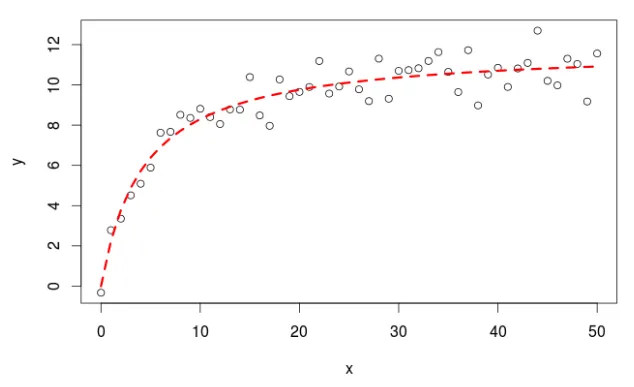
- 종속 변수와 독립 변수 간의 관계가 로그 함수를 통해 더 잘 표현될 때 사용
- 데이터가 초기에 빠르게 증가하고 점차 증가율이 줄어드는 패턴을 보일 때 효과적
- 인구 성장, 감염병의 확산과 같이 **초기 빠른 증가 후 점진적 감소**를 보이는 데이터에 적합

<span style="background-color:#a3f5e5; color:#054821; padding:4px; border-radius:0px;"> **스플라인 회귀** </span> 
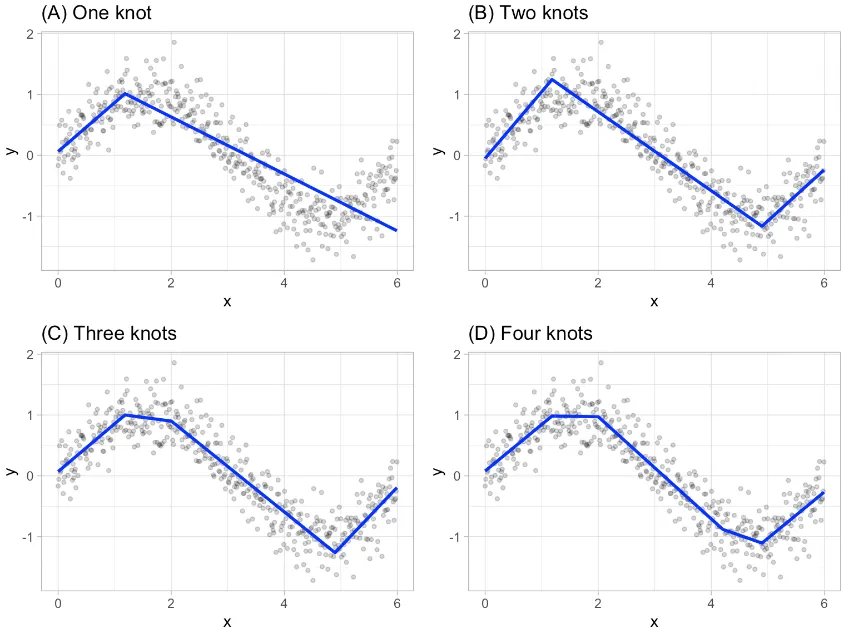
- 데이터를 구간별로 나누고 각 구간에서 다른 선형 또는 비선형 함수를 적용하여 예측하는 방식
- 데이터 패턴이 여러 구간에서 서로 다르게 나타날 때 유용
- 계절에 따라 판매량이 변화하는 소매 데이터 분석 등에서 적합